/tmp/ipykernel_36642/1547753396.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=line_congestion.index, y=line_congestion.values, palette="viridis")


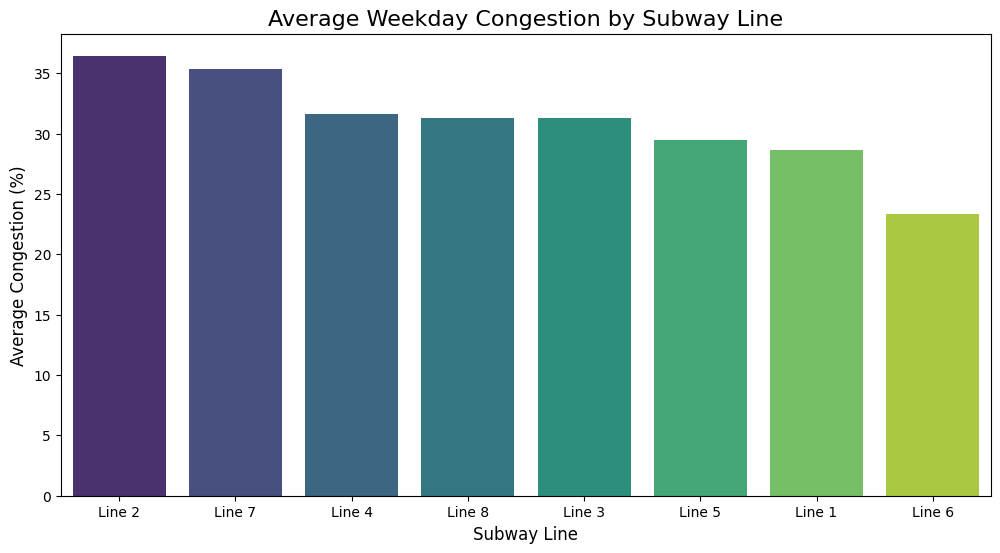

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df_long = pd.read_csv('preprocessed_congestion.csv')

# 1. Set figure size
plt.figure(figsize=(12, 6))

# 2. Filter for 'Weekday' data 
weekday_df = df_long[df_long['주중주말'] == '주중']

# 3. Calculate average congestion by line and sort
line_congestion = weekday_df.groupby('호선')['혼잡도'].mean().sort_values(ascending=False)

# 4. Create Seaborn Bar Plot
sns.barplot(x=line_congestion.index, y=line_congestion.values, palette="viridis")

# 5. Set English title and labels
plt.title('Average Weekday Congestion by Subway Line', fontsize=16)
plt.xlabel('Subway Line', fontsize=12)
plt.ylabel('Average Congestion (%)', fontsize=12)

# 6. Show plot
plt.show()

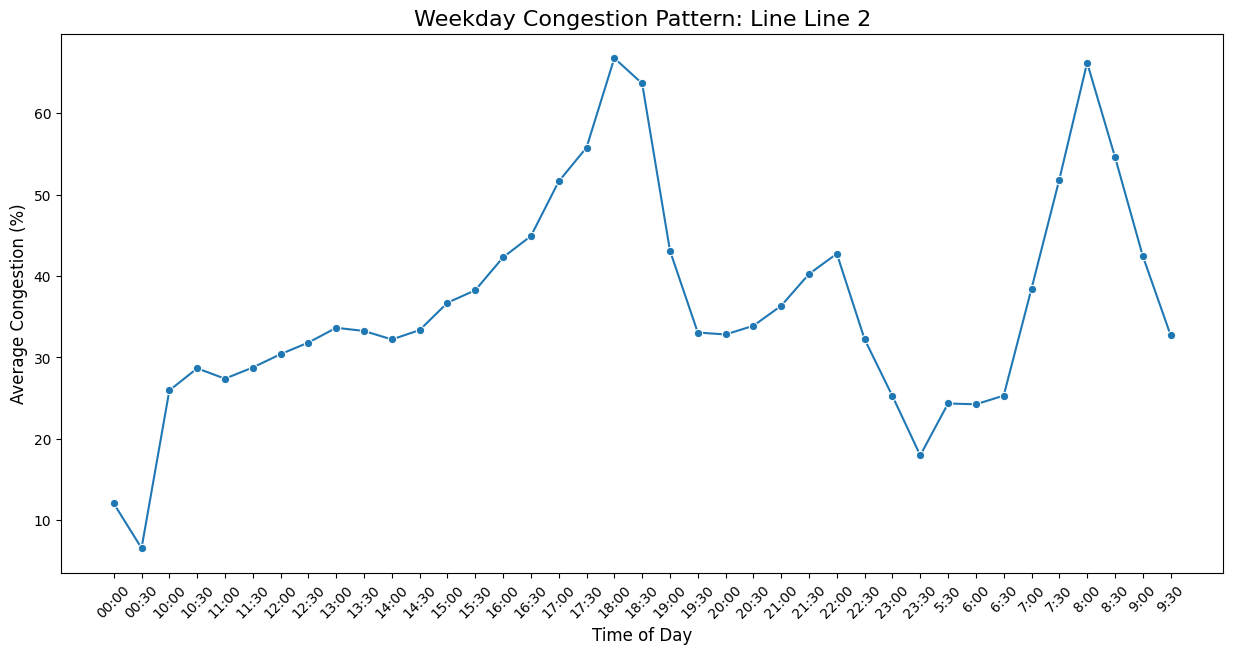

In [4]:
# 1. Set target line and day
target_line = 'Line 2' # <-- 분석하고 싶은 호선
target_day_value = '주중' 

# 2. Filter data for the target line and day
line_df = df_long[
    (df_long['호선'] == target_line) & 
    (df_long['주중주말'] == target_day_value)
]

# 3. Set figure size
plt.figure(figsize=(15, 7))

# 4. Create Seaborn Line Plot
# Sort by '시간' (time) column to ensure the line connects correctly
line_df = line_df.sort_values(by='시간') 
sns.lineplot(data=line_df, x='시간', y='혼잡도', errorbar=None, marker='o')

# 5. Set English title and labels
plt.title(f'Weekday Congestion Pattern: Line {target_line}', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Average Congestion (%)', fontsize=12)

# 6. Rotate x-axis labels for readability
plt.xticks(rotation=45)

# 7. Show plot
plt.show()

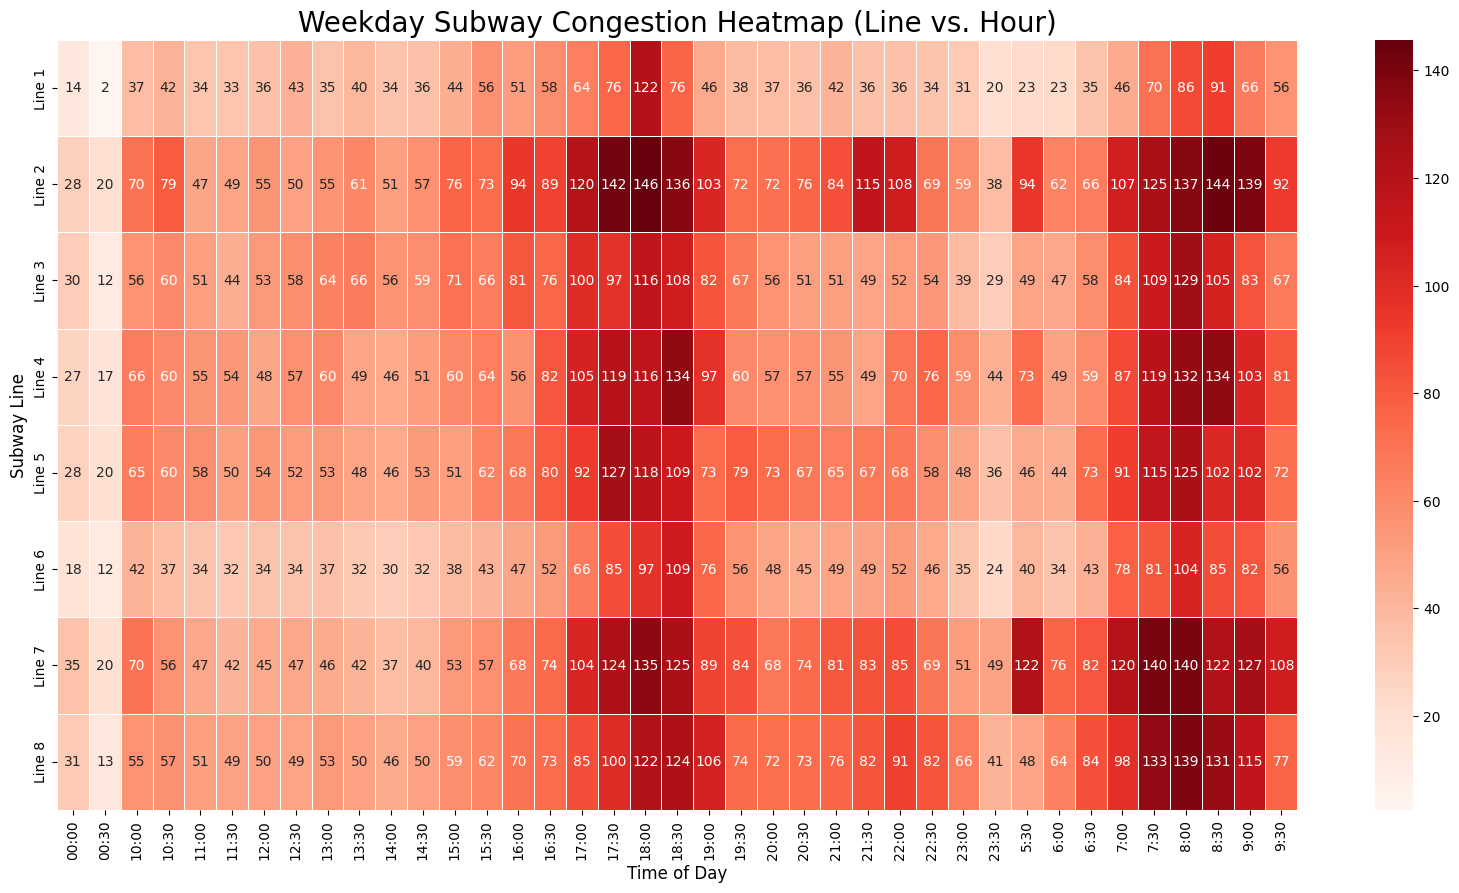

In [5]:
# 1. Prepare data for heatmap (Pivot Table)
# Use 'Weekday' data
weekday_df = df_long[df_long['주중주말'] == '주중']

heatmap_data = pd.pivot_table(weekday_df, 
                              values='혼잡도', 
                              index='호선', 
                              columns='시간', 
                              aggfunc='max')

# 2. Sort columns by time 
time_order = sorted(df_long['시간'].unique())
heatmap_data = heatmap_data[time_order]

# 3. Set figure size
plt.figure(figsize=(20, 10))

# 4. Create Seaborn Heatmap
sns.heatmap(heatmap_data, 
            cmap='Reds',     
            annot=True,       
            fmt='.0f',        
            linewidths=.5)    

# 5. Set English title and labels
plt.title('Weekday Subway Congestion Heatmap (Line vs. Hour)', fontsize=20)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Subway Line', fontsize=12)

# 6. Show plot
plt.show()